In [28]:
logs_per_experiment = 36

value_sizes = [64, 256, 512, 1024]
client_numbers = [4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
nServers = 3
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

## Middleware part

In [17]:
mw=1
path_to_experiment="/home/anastasiia/experiment_1/fourth_copy/"
path_to_logs = "/home/anastasiia/experiment_1/fourth_copy/middleware1_logs/"

mw_log = open(path_to_experiment+"mw_"+str(mw)+".log","r")
lines = mw_log.readlines()

def is_zero(line):
    parts = line.split(" ")
    if (parts[1] == '0' and parts[2] == '0' and parts[3] == '0' and parts[4] == '0' and parts[5] == '0' and
        parts[6] == '0' and parts[7] == '0' and parts[8] == '0' and parts[9] == '0' and parts[10] == '0'):
        return True
    return False

def check_following_lines(i):
    all_zero = True
    
    n = 0
    for j in range(64):
        n = j
        parts = lines[i+j].split(" ")
        if parts[0] == str(j) and is_zero(lines[i+j]):
            continue
        elif j == 8 or j == 32:
            break
        else:
            all_zero = False
            break
        
    return all_zero, n

new_experiment_positions=[]
new_experiment_positions_end=[]
invalidated_experiments=[]

i = 0
while i < len(lines):
    parts = lines[i].split(" ")
    if is_zero(lines[i]) or lines[i].startswith("DEBUG ethz.StatPrinter") or lines[i].startswith("SIGTERM call"):
        i += 1
        continue
    new_experiment_positions.append(i)
    while True:
        if not is_zero(lines[i]):
            i += 1
        elif is_zero(lines[i]):
            condition, nlines = check_following_lines(i)
            if (condition):
                break
            else:
                print("line numer="+str(i))
                print("condition not ok")
                i+=1
                continue
    new_experiment_positions_end.append(i)

for i in range(len(new_experiment_positions)):
    for j in range(new_experiment_positions[i], new_experiment_positions_end[i]):
        if lines[j].startswith("ERROR"):
            print("Error in line="+str(j))
            print("Invalidate experiment="+str(i))
            invalidated_experiments.append(i)
        elif lines[j].startswith("SIGTERM"):
            print("Sigterm reported in "+ str(i)+".Check the data")
            
for i in range(len(new_experiment_positions)):
    if i not in invalidated_experiments:
        f = open(path_to_logs+"log_"+str(i)+".log", "w")
        for j in range(new_experiment_positions[i], new_experiment_positions_end[i]):
            if (lines[j][0].isdigit()):
                f.write(lines[j])
        f.close()

line numer=176028
condition not ok
line numer=176033
condition not ok
line numer=269212
condition not ok
line numer=269215
condition not ok
line numer=269218
condition not ok


In [1]:
#### v1
#ex1
#log1 log2 log3 log4 |w1|
#log5 log6 log7 log8 |w2|
#log9 log10 log11 log12 |w3|
#
#log13 log14 log15 log16 |w1|
#log17 log18 log19 log20 |w2|
#log21 log22 log23 log24 |w3|
#
#log25 log26 log27 log28 |w1|
#log29 log30 log31 log32 |w2|
#log33 log34 log35 log36 |w3|
#
#log37 log38 log39 log40 |w1|
#log41 log42 log43 log44 |w2|5534
#log45 log46 log47 log48 |w3|

path_to_logs = "/home/anastasiia/experiment_1/fourth_copy/middleware1_logs/"

logs_per_experiment = 36

value_sizes = [64, 256, 512, 1024]
client_numbers = [4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
nServers = 3
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

data=[]
k = 36
l = 0
for v in value_sizes:
    print("k="+str(k))
    for w in workers:
        for client in client_numbers:
            for rep in range(repetitions):
                data.append(pd.read_csv(path_to_logs+"log_"+str(k)+".log", header=None, delimiter=' '))
                for j in range(w):
                    d = data[l].index[data[l][0] == j].tolist()
                    data[l] = data[l].drop([d[0]])
                    data[l] = data[l].drop([d[len(d)-1]])
                k += 1
                l += 1
    k += logs_per_experiment * 3
        
global_data_4 = pd.DataFrame(columns=['Worker threads',
                                    'Value size',
                                    'Client number',
                                    'Repetition',
                                    'Worker thread',
                                    'Time1',
                                    'Time2',
                                    'Time3',
                                    'Time4',
                                    'Time5',
                                    'Queue size',
                                    'Left queue',
                                    'Successful',
                                    'Per server1',
                                    'Per server2',
                                    'Per server3',
                                    'Duration'])

print("Start adding data to global table")
k = 0
m = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                print("m="+str(m))
                for d in range (len(data[m])):
                    if nServers == 1:
                        newline = [w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[m].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8],
                             data[m].iloc[d, 9], 0, 0, 5000]
                    elif nServers == 3:
                        newline = [w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[m].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8], 
                             data[m].iloc[d, 9], 
                             data[m].iloc[d, 10],
                             data[m].iloc[d, 11], 5000]
                    global_data_4.loc[k] = newline
                    k += 1
                m += 1    


k=36
k=180
k=324
k=468
Start adding data to global table
m=0
m=1
m=2
m=3
m=4
m=5
m=6
m=7
m=8
m=9
m=10
m=11
m=12
m=13
m=14
m=15
m=16
m=17
m=18
m=19
m=20
m=21
m=22
m=23
m=24
m=25
m=26
m=27
m=28
m=29
m=30
m=31
m=32
m=33
m=34
m=35
m=36
m=37
m=38
m=39
m=40
m=41
m=42
m=43
m=44
m=45
m=46
m=47
m=48
m=49
m=50
m=51
m=52
m=53
m=54
m=55
m=56
m=57
m=58
m=59
m=60
m=61
m=62
m=63
m=64
m=65
m=66
m=67
m=68
m=69
m=70
m=71
m=72
m=73
m=74
m=75
m=76
m=77
m=78
m=79
m=80
m=81
m=82
m=83
m=84
m=85
m=86
m=87
m=88
m=89
m=90
m=91
m=92
m=93
m=94
m=95
m=96
m=97
m=98
m=99
m=100
m=101
m=102
m=103
m=104
m=105
m=106
m=107
m=108
m=109
m=110
m=111
m=112
m=113
m=114
m=115
m=116
m=117
m=118
m=119
m=120
m=121
m=122
m=123
m=124
m=125
m=126
m=127
m=128
m=129
m=130
m=131
m=132
m=133
m=134
m=135
m=136
m=137
m=138
m=139
m=140
m=141
m=142
m=143


In [6]:
global_data_4.to_pickle("/home/anastasiia/experiment_1/fourth_copy/global_data_4.pkl")

In [46]:
global_data_4 = pd.read_pickle("/home/anastasiia/experiment_1/fourth_copy/global_data_4.pkl")

Start drawing graphs


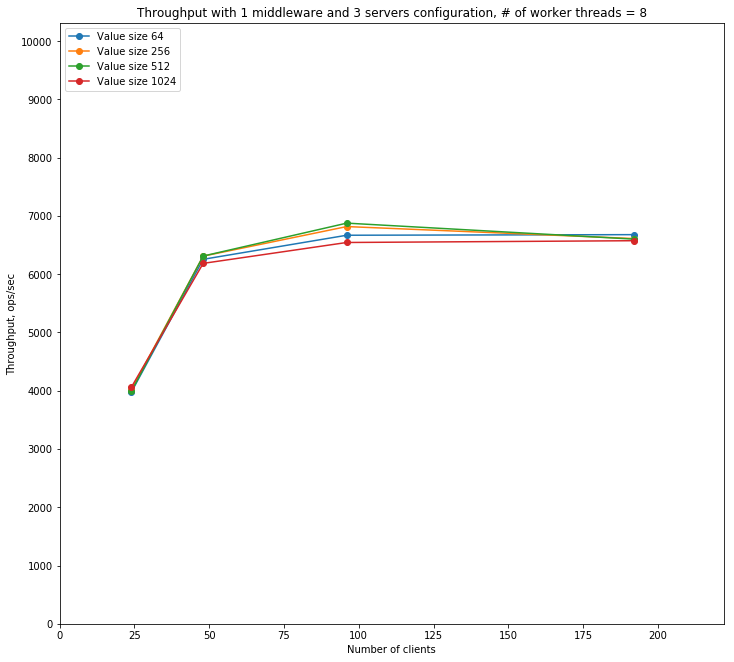

[[3977.0153846153844, 6255.871794871794, 6668.964102564103, 6679.1487179487185], [4018.9128205128204, 6310.041025641025, 6817.820512820513, 6612.051282051281], [3991.0358974358974, 6311.8512820512815, 6876.758974358974, 6602.128205128204], [4060.646153846154, 6186.046153846154, 6544.6102564102575, 6575.1487179487185]]


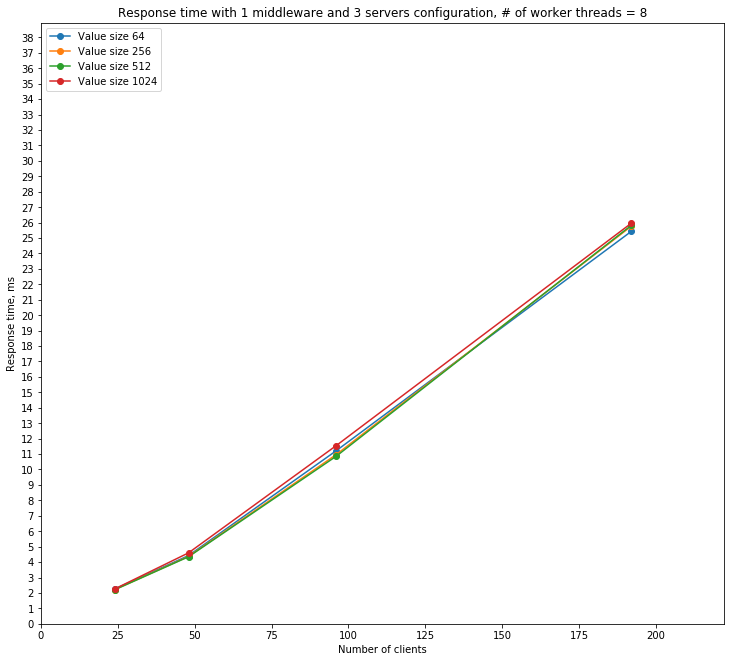

[[2.252994772526234, 4.421012464187491, 11.212767446295429, 25.433841561261453], [2.215966047712865, 4.369318578935649, 10.964306211098368, 25.770305192538878], [2.2076576738639924, 4.344527307604499, 10.856420138288163, 25.826150075927345], [2.260163217676611, 4.597573198240209, 11.545816914133297, 25.962010023756896]]


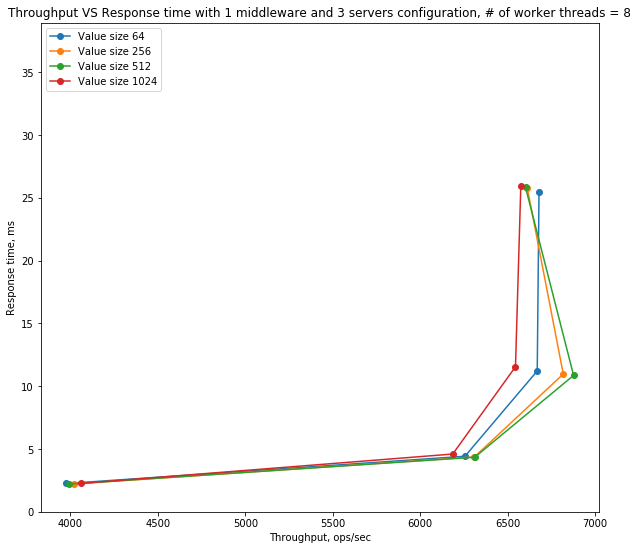

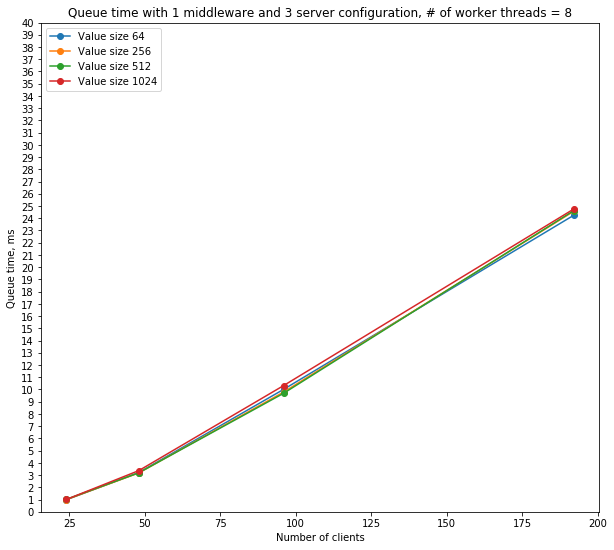

[[0.9863317163495883, 3.210210714856606, 10.014361204754053, 24.237282656933097], [0.9930814303651453, 3.1772063735617144, 9.792077323755619, 24.561586070500642], [1.019872740449109, 3.1880833044228565, 9.694285023952848, 24.61549539192879], [1.0073147383389784, 3.366215444354084, 10.324588093236244, 24.746500810355073]]


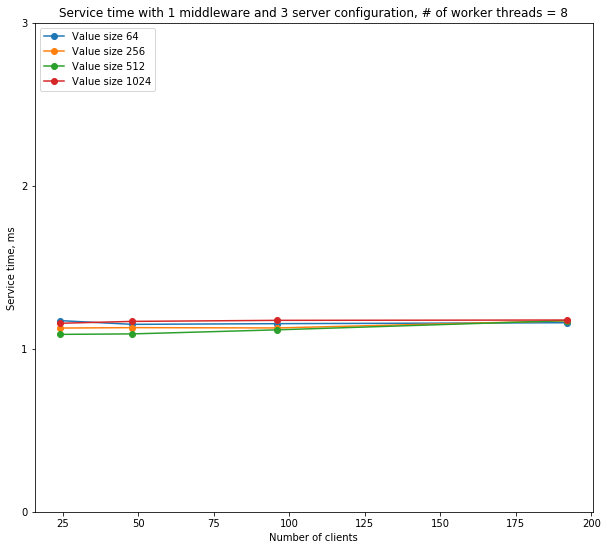

[[1.1723699514389094, 1.149422696215658, 1.153673964664485, 1.1593646971746743], [1.1267953573360827, 1.1292770659380489, 1.1274721224543525, 1.1711498041648896], [1.0879599409959757, 1.0908953527389664, 1.1158155899320492, 1.1725325555473567], [1.1559989189544169, 1.1675748313615675, 1.174000293057744, 1.1759570223233713]]


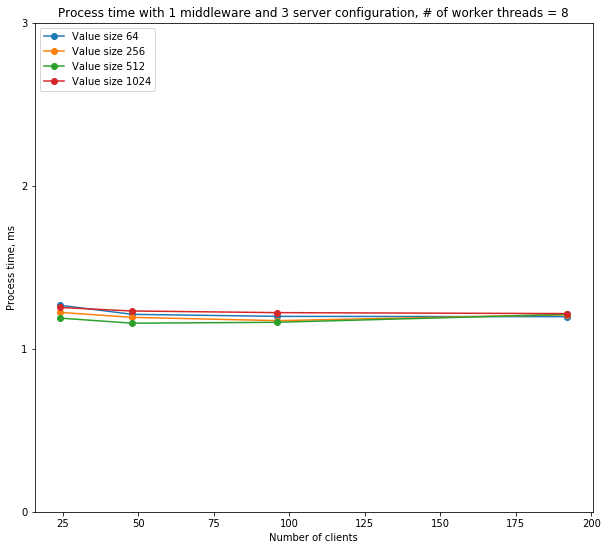

[[1.2666630561766459, 1.210801749330885, 1.1984062415413763, 1.1965589043283573], [1.22288461734772, 1.1921122053739337, 1.1722288873427482, 1.2087191220382363], [1.1877849334148838, 1.156444003181642, 1.162135114335316, 1.2106546839985552], [1.2528484793376322, 1.2313577538861242, 1.2212288208970543, 1.2155092134018222]]


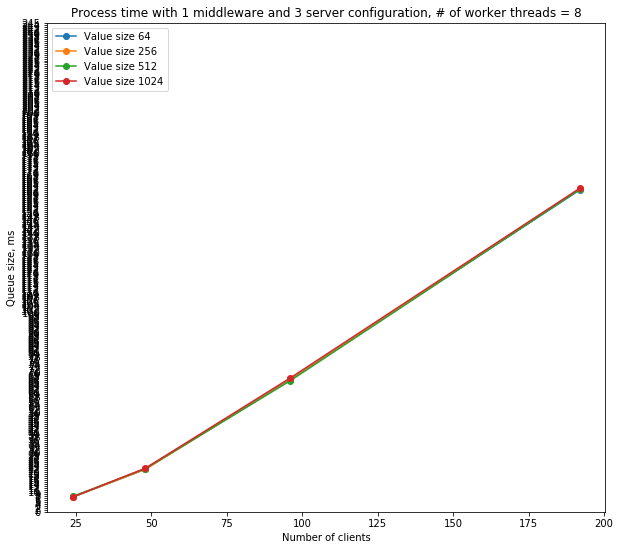

[[7.322554731160333, 21.306016501420203, 66.19123717365092, 161.2255891661305], [7.402773807943977, 21.20060822880586, 65.96824009477426, 161.68435180517318], [7.718475506648232, 21.5505906268306, 65.57496524898431, 161.51012455191218], [7.392466274156191, 21.783961256060994, 66.9552851867146, 162.09489577695035]]


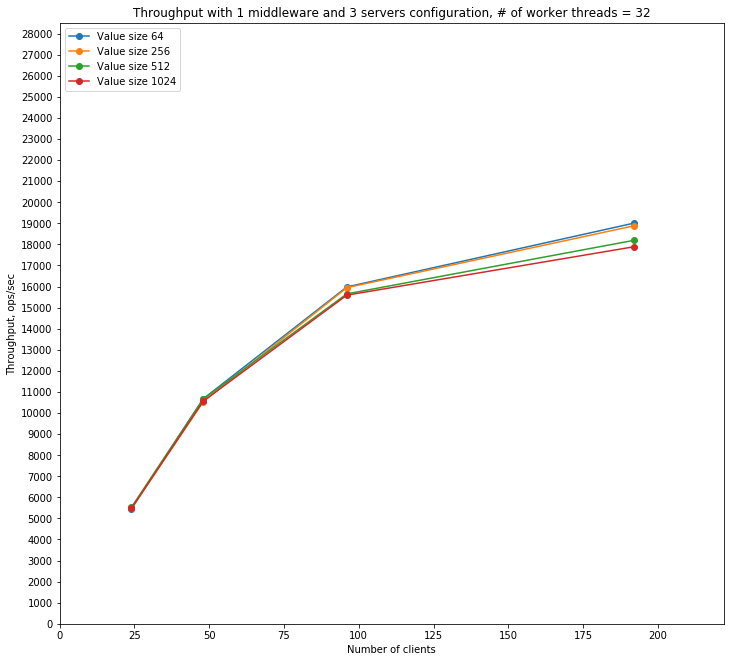

[[5466.6871794871795, 10674.292307692305, 15980.051282051283, 19005.83076923077], [5469.9794871794875, 10536.964102564101, 15944.40512820513, 18878.77435897436], [5530.082051282051, 10664.953846153847, 15650.574358974358, 18189.66153846154], [5479.2, 10562.902564102564, 15589.461538461539, 17884.28205128205]]


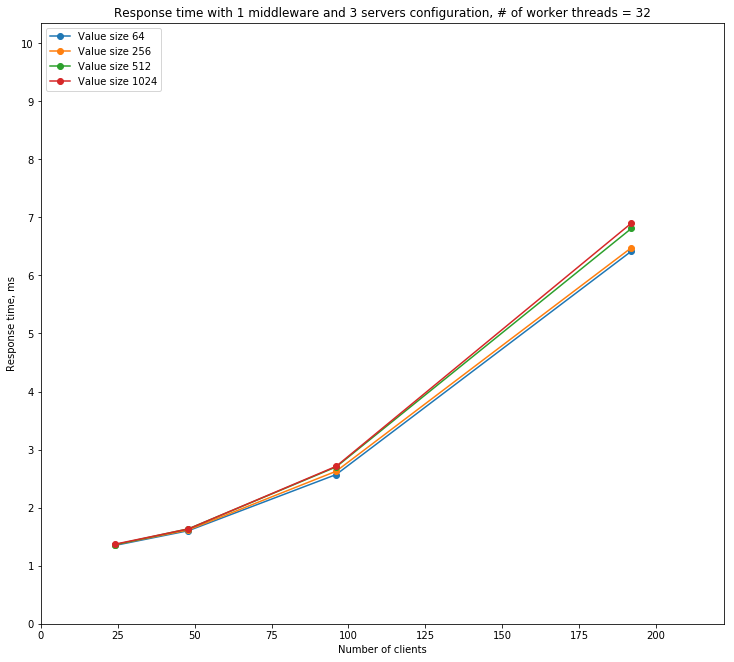

[[1.3487594793265316, 1.6038452317982288, 2.5701599109145694, 6.417411714677574], [1.361006369498409, 1.6175247285745713, 2.6269566786388214, 6.477141507300384], [1.360856147170812, 1.6359280769123503, 2.701517630875839, 6.80944797044475], [1.3695692053116495, 1.6345070265263142, 2.7114763589472837, 6.900296923096775]]


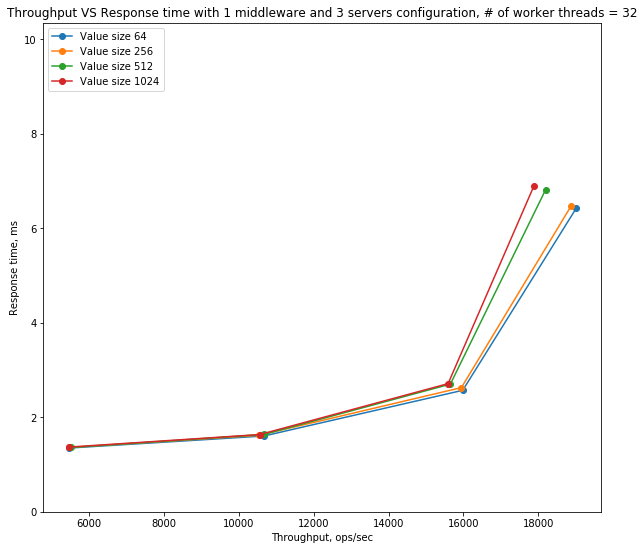

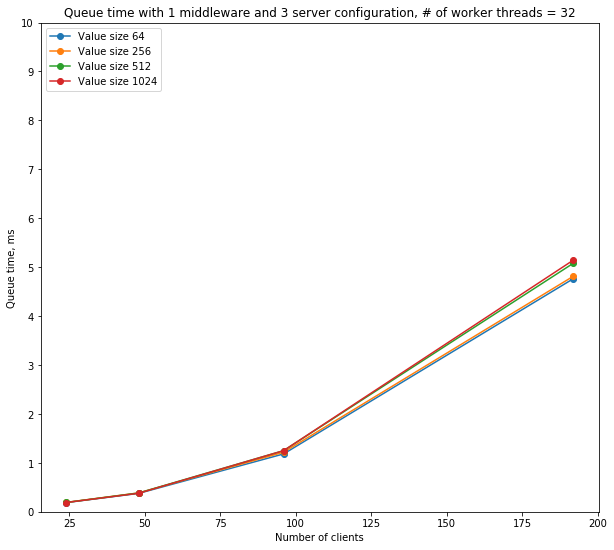

[[0.18867659033174358, 0.37645250727004304, 1.1829479703861545, 4.766172432373655], [0.192419040618912, 0.3857686834333638, 1.2178663104717384, 4.816396114299878], [0.19082111268344884, 0.3848584339985363, 1.2498497638490862, 5.082077618619087], [0.19003616474050114, 0.3792100656093945, 1.2496239241170484, 5.145917271576388]]


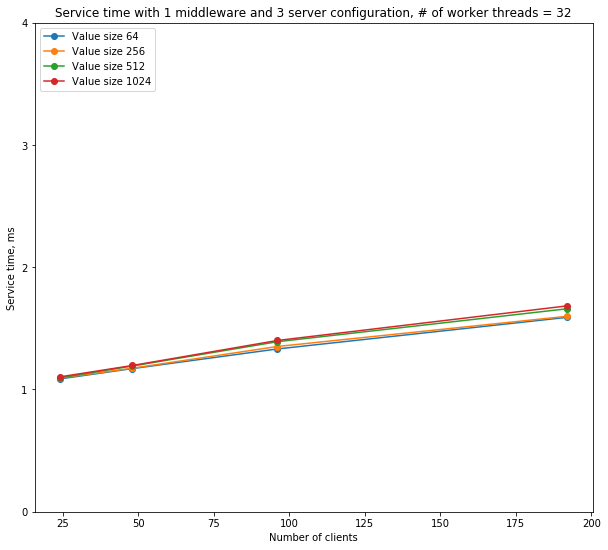

[[1.0865259417413067, 1.170804814058411, 1.331436630927663, 1.590013537006322], [1.093603688571466, 1.174224756023727, 1.3514609577702523, 1.5986617946231325], [1.0953627989013006, 1.1923034756542636, 1.3906149753822419, 1.6600982694029633], [1.1033109830744523, 1.196180537012457, 1.4006950783649046, 1.6836325264843646]]


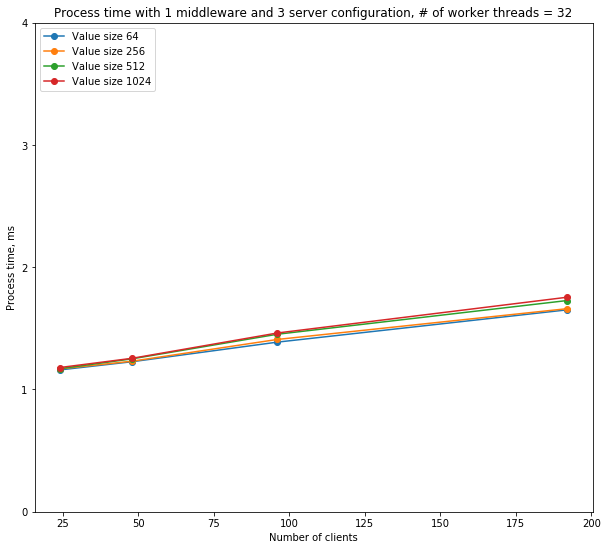

[[1.160082888994788, 1.2273927245281857, 1.3872119405284153, 1.651239282303919], [1.168587328879497, 1.2317560451412075, 1.409090368167083, 1.6607453930005067], [1.1700350344873631, 1.251069642913814, 1.4516678670267529, 1.7273703518256636], [1.1795330405711484, 1.2552969609169196, 1.4618524348302353, 1.7543796515203869]]


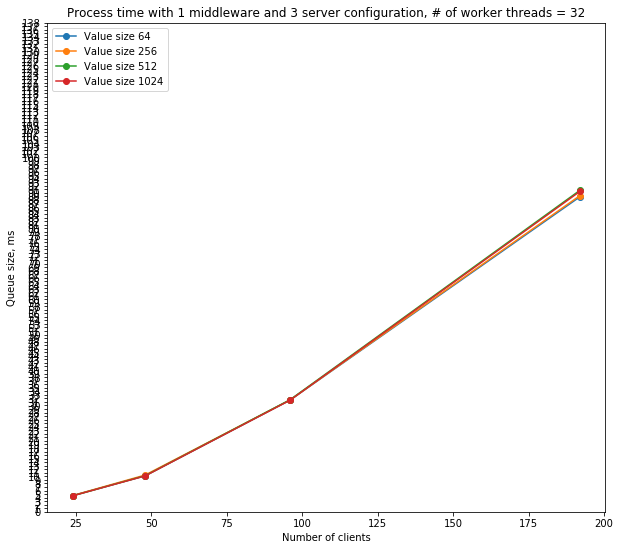

[[4.567715505757952, 10.166930660628674, 31.518690611050314, 88.8606190219088], [4.586396986441612, 10.372971244575872, 31.5464268633415, 89.19620206233836], [4.507995430122983, 10.187337293584642, 31.612261301461206, 90.69465185069907], [4.521535054715081, 10.118227021904431, 31.48895062246192, 90.38072910319475]]


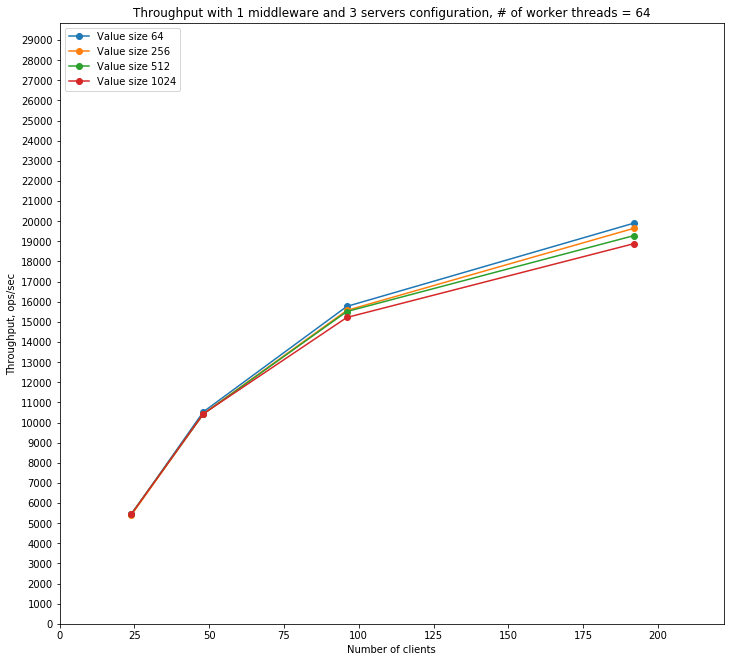

[[5444.871794871794, 10527.774358974357, 15768.07692307692, 19904.63076923077], [5412.138461538462, 10425.097435897436, 15570.08205128205, 19647.92820512821], [5476.292307692308, 10417.620512820513, 15513.64102564103, 19284.71282051282], [5456.989743589745, 10429.415384615388, 15218.27692307692, 18884.5282051282]]


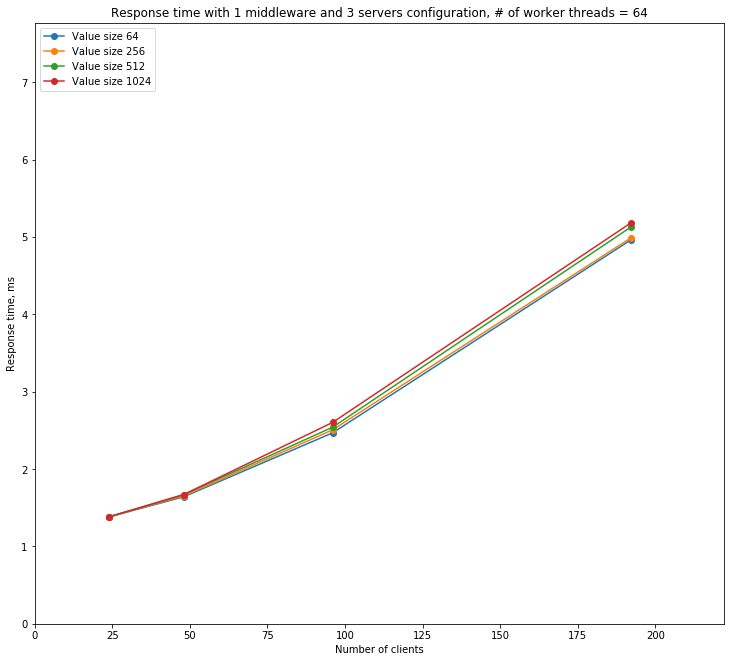

[[1.3819627972686603, 1.641151415839713, 2.468384515940191, 4.960915679201568], [1.382787219990771, 1.652260275252915, 2.5070882158617147, 4.98681142345275], [1.3819082160211336, 1.669233980297681, 2.541684406775179, 5.127133515347217], [1.3836406471869058, 1.67030725718579, 2.603181599453289, 5.180193907208805]]


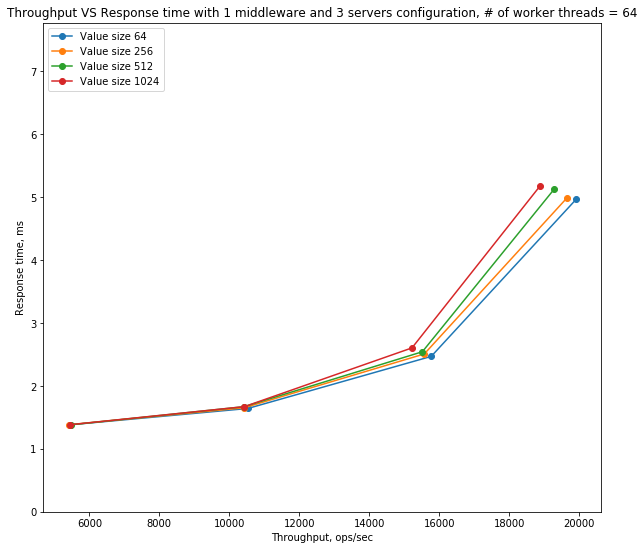

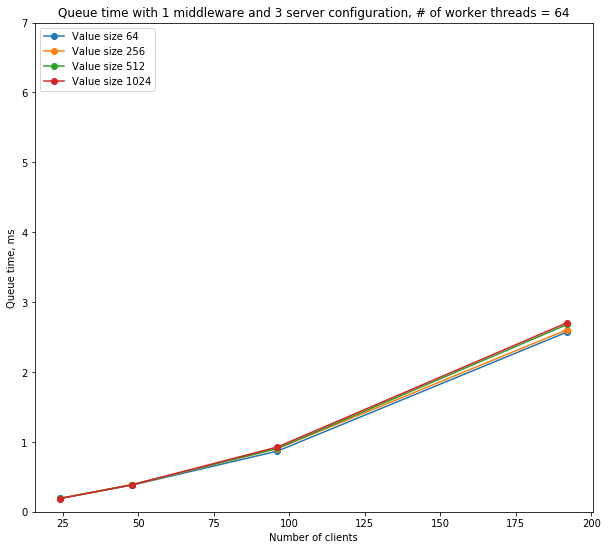

[[0.19122674829291264, 0.38237170931494513, 0.8677789431747038, 2.5736961608985203], [0.1902361927177939, 0.38766605637086826, 0.9040273160294924, 2.606232378908092], [0.19221876676808283, 0.390113200711221, 0.90613620436605, 2.6803999660685136], [0.1897157538720042, 0.3876461841654964, 0.9267284547190895, 2.70633455741683]]


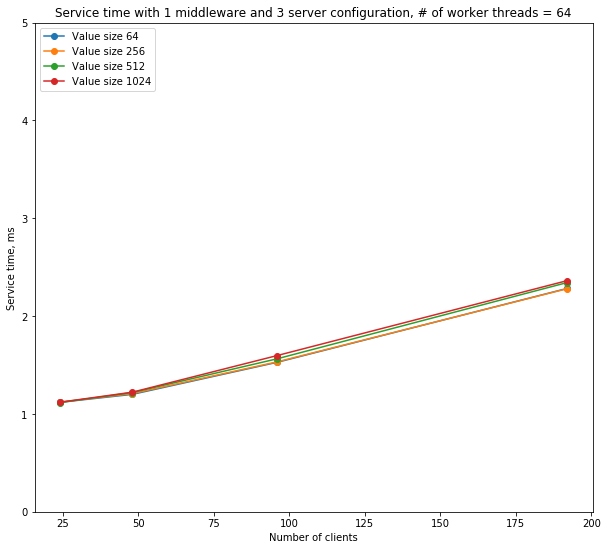

[[1.1189809277136802, 1.200298989340041, 1.5282340984299663, 2.2829438221179297], [1.1214345341478367, 1.2079459135596837, 1.5328967520221224, 2.2800668485696676], [1.1161135598950067, 1.218958903947749, 1.5642128019674992, 2.343123648624033], [1.1196461278078549, 1.2225003638623695, 1.597328987681479, 2.362656120883654]]


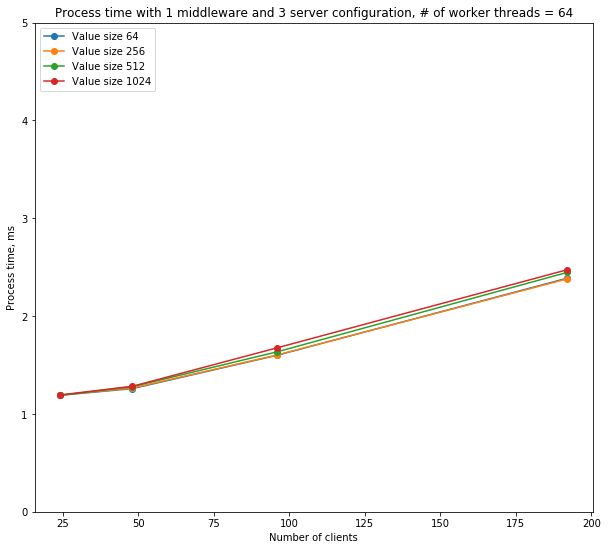

[[1.1907360489757475, 1.2587797065247677, 1.600605572765487, 2.3872195183030467], [1.192551027272977, 1.264594218882047, 1.6030608998322224, 2.380579044544659], [1.1896894492530508, 1.2791207795864599, 1.6355482024091288, 2.4467335492787035], [1.1939248933149018, 1.2826610730202939, 1.6764531447341995, 2.473859349791975]]


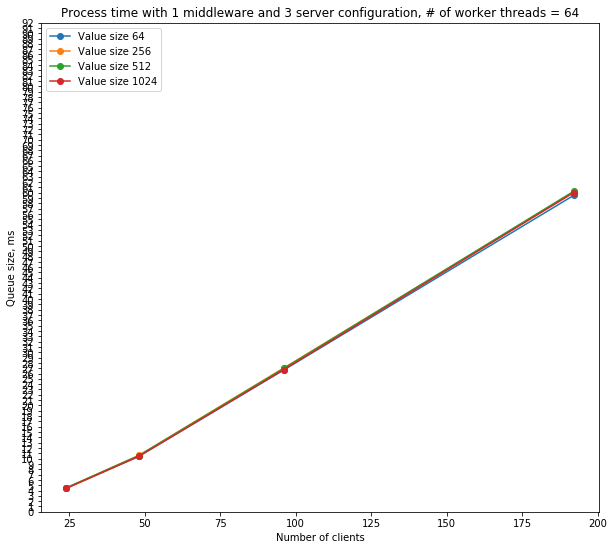

[[4.452573581351542, 10.429560683437607, 26.663487897488434, 59.487746569990286], [4.493346864171421, 10.591536499197694, 27.03406500171598, 60.0494150097642], [4.512433548058437, 10.570965071013806, 26.95683467981859, 60.256646489487224], [4.403584017862765, 10.423397628797444, 26.737854347875903, 60.024104931373756]]


In [47]:
print("Start drawing graphs")
TR_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_TR_value_file.txt", "w+")
RT_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_RT_value_file.txt", "w+")
QT_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_QT_value_file.txt", "w+")
QS_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_QS_value_file.txt", "w+")
import numpy as np
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_mid_cl_"
X_axis = [i * 6 for i in client_numbers]
for w in workers:
    TR_overall = []
    RT_overall = []
    QT_overall = []
    ST_overall = []
    QS_overall = []
    PT_overall = []
    for value_size in value_sizes:
        TR = []
        RT = []
        QT = []
        ST = []
        QS = []
        PT = []
        TR_error = []
        RT_error = []
        for client_number in client_numbers:
            subset = global_data_4[(global_data_4['Worker threads'] == w) &
                                 (global_data_4['Value size'] == value_size) & 
                                 (global_data_4['Client number'] == client_number)]
            
            # for graphs
            groupped0 = subset.groupby(['Repetition']).sum()
            groupped1 = groupped0[[ 'Time5', 'Successful']].mean()
            RT.append(groupped1['Time5'] / groupped1['Successful'] / 1000000.0)
            groupped_std = groupped0['Time5'] / groupped0['Successful'] / 1000000.0
            RT_std = np.std(groupped_std.values)
            RT_error.append(RT_std)
            
            groupped2 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            groupped3 = groupped2['Successful'] / groupped2['Duration'] * 1000.0
            TR.append(groupped3.groupby(['Repetition']).sum().mean())
            TR_std = np.std(groupped3.groupby(['Repetition']).sum().values)
            TR_error.append(TR_std)
            
            # print to file
            TR_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped3.groupby(['Repetition']).sum().mean()))
            for v in groupped3.groupby(['Repetition']).sum().values:
                TR_value_file.write(" " + str(v))
            TR_value_file.write("\n")
            
            # end print to file
             # print to file
            RT_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped1['Time5'] / groupped1['Successful'] / 1000000.0))
            for v in groupped_std.values:
                RT_value_file.write(" " + str(v))
            RT_value_file.write("\n")
            
            # end print to file
            
            '''groupped = subset.groupby(['Repetition']).sum()
            TR_std = np.std(groupped['TR'].values)
            TR_error.append(TR_std)
            TR.append(float(groupped.mean()['TR']))
            groupped1 = subset.groupby(['Repetition']).sum()
            groupped2 = groupped1['Total time']/groupped1['Total ops']
            RT.append(float(groupped2.mean()))
            RT_std = np.std(groupped2.values)
            RT_error.append(RT_std)'''
            
            # for formula checks
            # queue average time for all threads
            groupped4 = subset.groupby(['Repetition']).sum()
            groupped5 = groupped4[[ 'Time1', 'Successful']].mean()
            QT.append(groupped5['Time1'] / groupped5['Successful'] / 1000000.0)
            
            # print to file
            QT_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped5['Time1'] / groupped5['Successful'] / 1000000.0))
            QT_value_file.write("\n")
            
            # end print to file
            
            # average service time
            groupped6 = subset.groupby(['Repetition']).sum()
            groupped7 = groupped6[['Time3', 'Successful']].mean()
            ST.append(groupped7['Time3'] / groupped7['Successful'] / 1000000.0)
            
            # average process time
            groupped13 = subset.groupby(['Repetition']).sum()
            groupped14 = groupped13[['Time4', 'Successful']].mean()
            PT.append(groupped14['Time4'] / groupped14['Successful'] / 1000000.0)
            
            # average queue size
            groupped8 = subset.groupby(['Repetition']).sum()
            groupped9 = groupped8[['Queue size', 'Successful']].mean()
            QS.append(groupped9['Queue size'] / groupped9['Successful'])
            
            # print to file
            QS_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped9['Queue size'] / groupped9['Successful']))
            QS_value_file.write("\n")
            
            # end print to file
            
            # TR per worker
            #groupped10 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            #groupped11 = groupped10['Successful'] / groupped10['Duration'] * 1000.0    
            #groupped12 = groupped11.groupby(['Repetition']).mean().mean()
            #print(groupped12)
        TR_overall.append(TR)
        RT_overall.append(RT)
        QT_overall.append(QT)
        ST_overall.append(ST)
        QS_overall.append(QS)
        PT_overall.append(PT)
        
    plt.figure(figsize=(10, 9))
    plt.title("Throughput with 1 middleware and 3 servers configuration, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        plt.plot(X_axis, TR_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        '''plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(TR_overall[i]) + max(TR_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.yticks(np.arange(0, max1, 1000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_tr.pdf")
    #plt.savefig(prefix + str(w)+"_tr.png", dpi=300)
    plt.show()
    print(TR_overall)

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Response time with 1 middleware and 3 servers configuration, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.plot(X_axis, RT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        '''plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.yticks(np.arange(0, max1, 1))
    plt.ylabel('Response time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_rt.pdf")
    #plt.savefig(prefix + str(w)+"_rt.png", dpi=300) 
    plt.show()
    print(RT_overall)

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Throughput VS Response time with 1 middleware and 3 servers configuration, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.plot(TR_overall[i], RT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        '''plt.errorbar(TR_overall[i], RT_overall[i],
                xerr=TR_error_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.ylabel('Response time, ms')
    plt.xlabel('Throughput, ops/sec') 
    plt.legend(loc="upper left")
    plt.savefig(prefix + str(w) + "_rttr.pdf", bbox_inches = 'tight',
                pad_inches = 0)
    #plt.savefig(prefix + str(w)+"_rttr.png", dpi=300) 
    plt.show()
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Queue time with 1 middleware and 3 server configuration, # of worker threads = "+str(w))
    for i in range(len(QT_overall)):
        plt.plot(X_axis, QT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        '''plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(QT_overall[i]) + max(QT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1 + 3, 1))
    plt.ylabel('Queue time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    #plt.savefig(prefix+str(w)+"_qt.png", dpi=300) 
    plt.show()
    print(QT_overall)
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Service time with 1 middleware and 3 server configuration, # of worker threads = "+str(w))
    for i in range(len(ST_overall)):
        plt.plot(X_axis, ST_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        '''plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(ST_overall[i]) + max(ST_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1 + 2, 1))
    plt.ylabel('Service time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    #plt.savefig(prefix+str(w)+"_qt.png", dpi=300) 
    plt.show()
    print(ST_overall)
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Process time with 1 middleware and 3 server configuration, # of worker threads = "+str(w))
    for i in range(len(PT_overall)):
        plt.plot(X_axis, PT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        '''plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(PT_overall[i]) + max(PT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1 + 2, 1))
    plt.ylabel('Process time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    #plt.savefig(prefix+str(w)+"_qt.png", dpi=300) 
    plt.show()
    print(PT_overall)
    
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Process time with 1 middleware and 3 server configuration, # of worker threads = "+str(w))
    for i in range(len(QS_overall)):
        plt.plot(X_axis, QS_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        '''plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(QS_overall[i]) + max(QS_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1 + 2, 1))
    plt.ylabel('Queue size, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    #plt.savefig(prefix+str(w)+"_qt.png", dpi=300) 
    plt.show()
    print(QS_overall)
    
TR_value_file.close()
RT_value_file.close()
QS_value_file.close()
QT_value_file.close()

Start drawing graphs


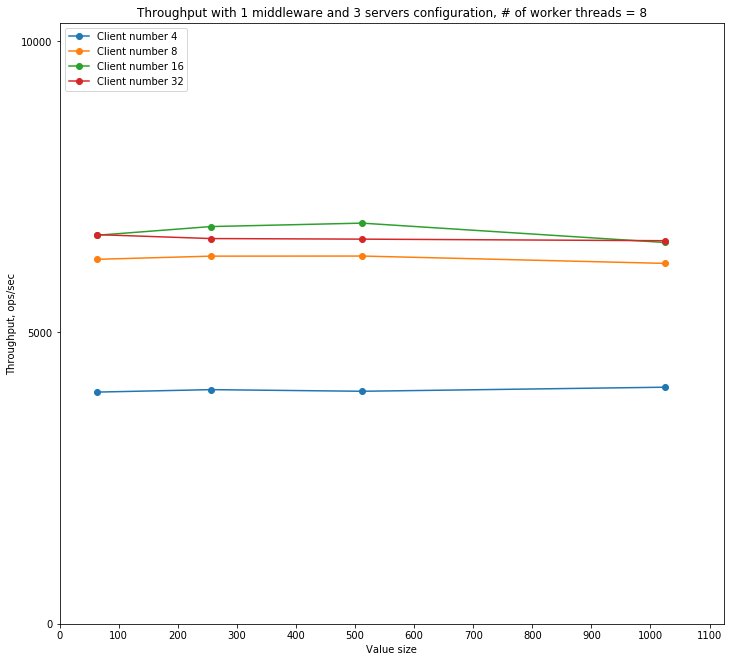

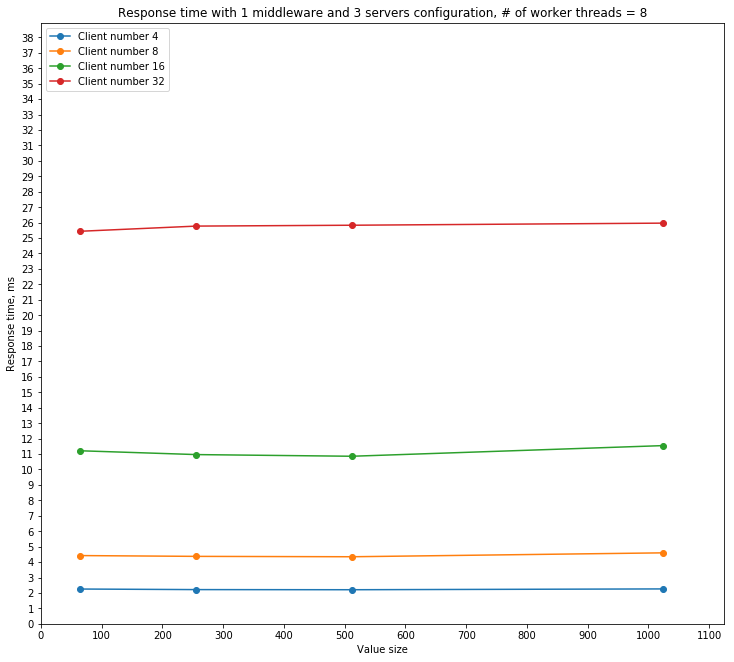

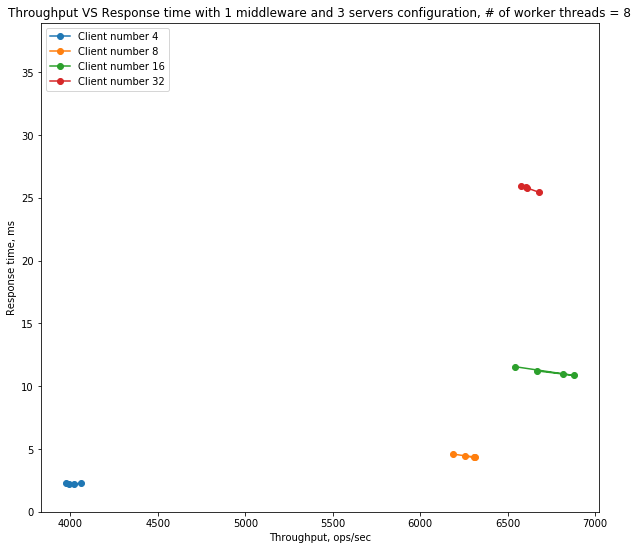

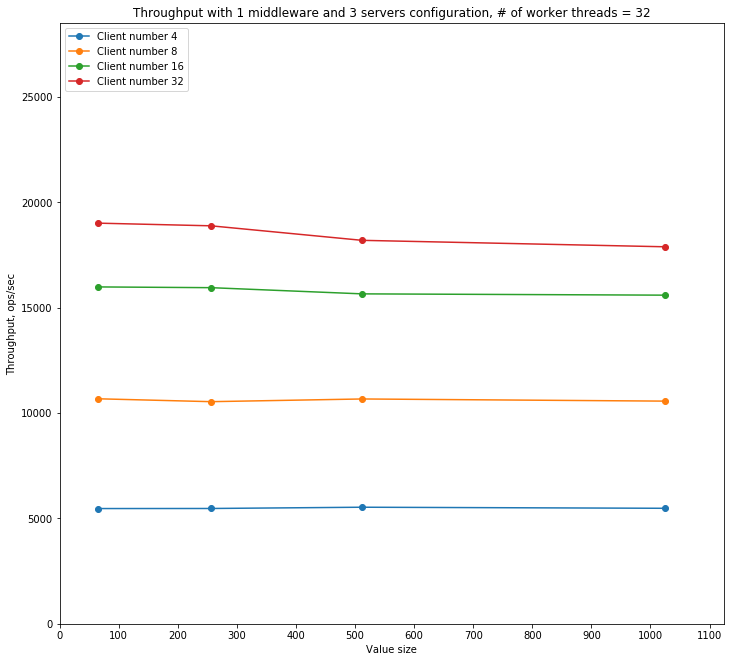

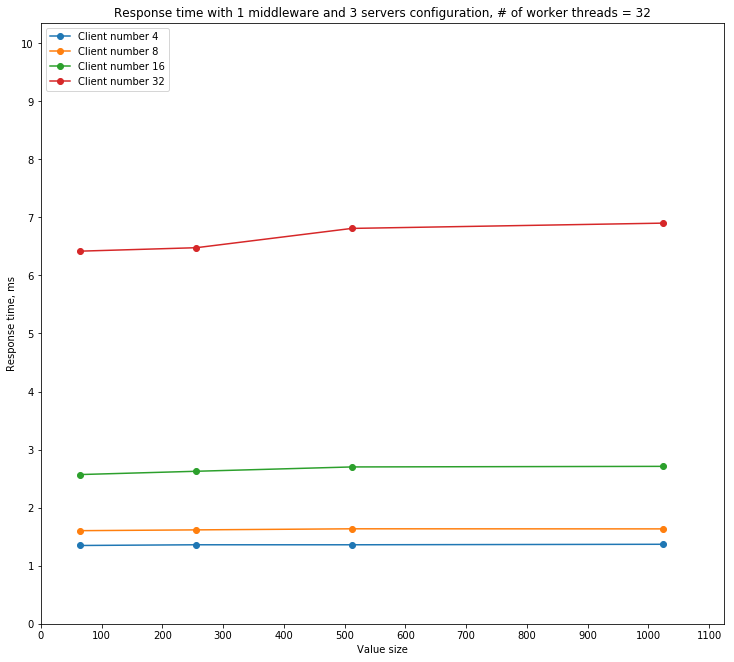

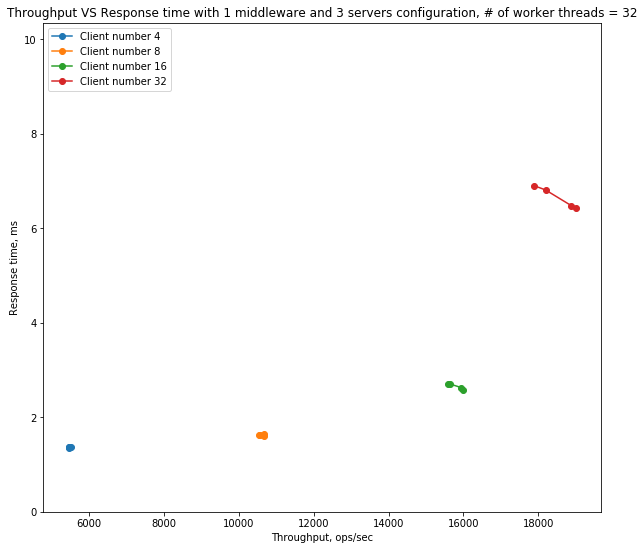

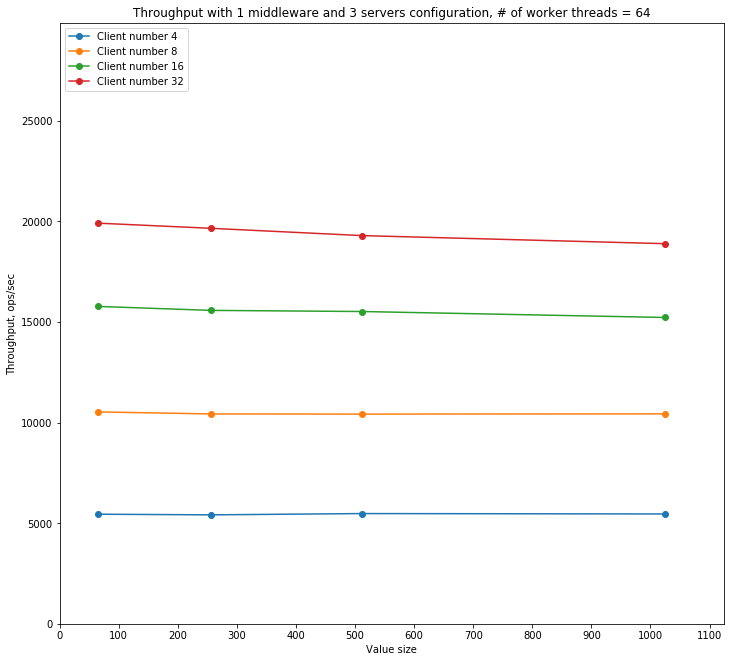

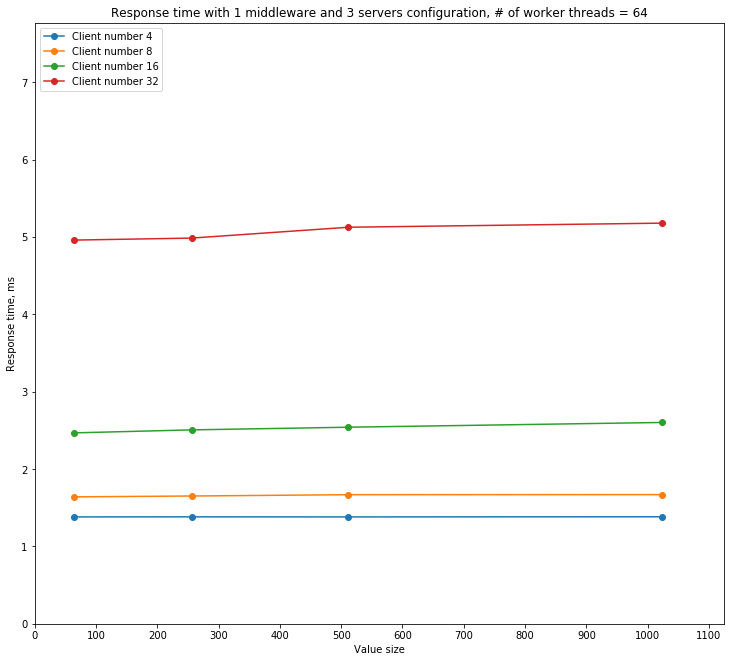

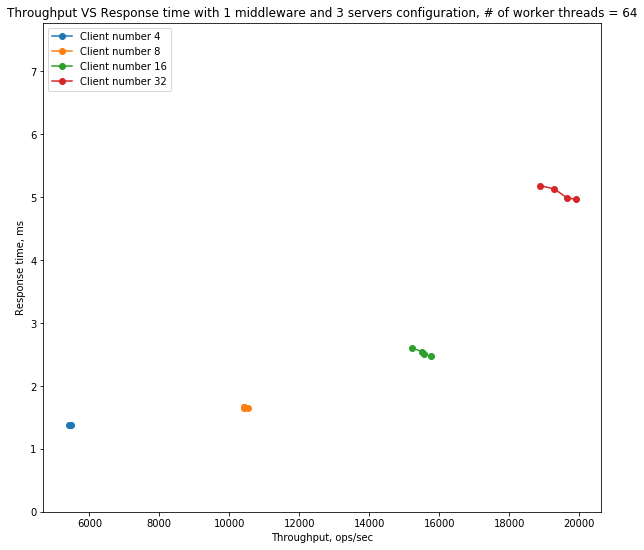

In [38]:
print("Start drawing graphs")
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_mid_vl_"
X_axis = value_sizes
for w in workers:
    TR_overall = []
    RT_overall = []
    QT_overall = []
    ST_overall = []
    QS_overall = []
    PT_overall = []
    for client_number in client_numbers:
        TR = []
        RT = []
        QT = []
        ST = []
        QS = []
        PT = []
        TR_error = []
        RT_error = []
        for value_size in value_sizes:
            subset = global_data_4[(global_data_4['Worker threads'] == w) &
                                 (global_data_4['Value size'] == value_size) & 
                                 (global_data_4['Client number'] == client_number)]
            
            # for graphs
            groupped0 = subset.groupby(['Repetition']).sum()
            groupped1 = groupped0[[ 'Time5', 'Successful']].mean()
            RT.append(groupped1['Time5'] / groupped1['Successful'] / 1000000.0)
            
            groupped2 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            groupped3 = groupped2['Successful'] / groupped2['Duration'] * 1000.0
            TR.append(groupped3.groupby(['Repetition']).sum().mean())
            
            '''groupped = subset.groupby(['Repetition']).sum()
            TR_std = np.std(groupped['TR'].values)
            TR_error.append(TR_std)
            TR.append(float(groupped.mean()['TR']))
            groupped1 = subset.groupby(['Repetition']).sum()
            groupped2 = groupped1['Total time']/groupped1['Total ops']
            RT.append(float(groupped2.mean()))
            RT_std = np.std(groupped2.values)
            RT_error.append(RT_std)'''
            
            # for formula checks
            # queue average time for all threads
            groupped4 = subset.groupby(['Repetition']).sum()
            groupped5 = groupped4[[ 'Time1', 'Successful']].mean()
            QT.append(groupped5['Time1'] / groupped5['Successful'] / 1000000.0)
            
            # average service time
            groupped6 = subset.groupby(['Repetition']).sum()
            groupped7 = groupped6[['Time3', 'Successful']].mean()
            ST.append(groupped7['Time3'] / groupped7['Successful'] / 1000000.0)
            
            # average process time
            groupped13 = subset.groupby(['Repetition']).sum()
            groupped14 = groupped13[['Time4', 'Successful']].mean()
            PT.append(groupped14['Time4'] / groupped14['Successful'] / 1000000.0)
            
            # average queue size
            groupped8 = subset.groupby(['Repetition']).sum()
            groupped9 = groupped8[['Queue size', 'Successful']].mean()
            QS.append(groupped9['Queue size'] / groupped9['Successful'])
            
            # TR per worker
            #groupped10 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            #groupped11 = groupped10['Successful'] / groupped10['Duration'] * 1000.0    
            #groupped12 = groupped11.groupby(['Repetition']).mean().mean()
            #print(groupped12)
        TR_overall.append(TR)
        RT_overall.append(RT)
        QT_overall.append(QT)
        ST_overall.append(ST)
        QS_overall.append(QS)
        PT_overall.append(PT)
        
    plt.figure(figsize=(10, 9))
    plt.title("Throughput with 1 middleware and 3 servers configuration, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        plt.plot(X_axis, TR_overall[i], '-o',
                label="Client number "+str(client_numbers[i]))
        '''plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(TR_overall[i]) + max(TR_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 100)
    plt.xticks(np.arange(0, max(X_axis) + 100, 100))
    plt.yticks(np.arange(0, max1, 5000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Value size')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_tr.pdf")
    #plt.savefig(prefix + str(w)+"_tr.png", dpi=300)
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Response time with 1 middleware and 3 servers configuration, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.plot(X_axis, RT_overall[i], '-o',
                label="Client number "+str(client_numbers[i]))
        '''plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.xlim(0, max(X_axis) + 100)
    plt.xticks(np.arange(0, max(X_axis) + 100, 100))
    plt.yticks(np.arange(0, max1, 1))
    plt.ylabel('Response time, ms')
    plt.xlabel('Value size') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_rt.pdf")
    #plt.savefig(prefix + str(w)+"_rt.png", dpi=300) 
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Throughput VS Response time with 1 middleware and 3 servers configuration, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.plot(TR_overall[i], RT_overall[i], '-o',
                label="Client number "+str(client_numbers[i]))
        '''plt.errorbar(TR_overall[i], RT_overall[i],
                xerr=TR_error_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.ylabel('Response time, ms')
    plt.xlabel('Throughput, ops/sec') 
    plt.legend(loc="upper left")
    plt.savefig(prefix + str(w) + "_rttr.pdf", bbox_inches = 'tight',
                pad_inches = 0)
    #plt.savefig(prefix + str(w)+"_rttr.png", dpi=300) 
    plt.show()

## Client part

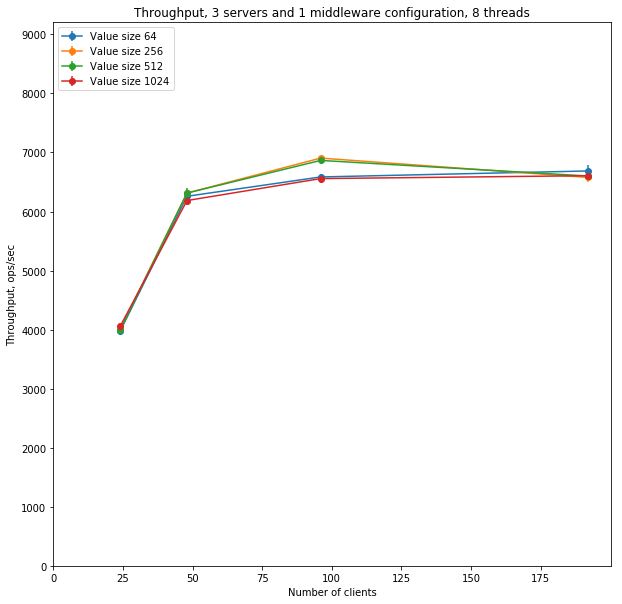

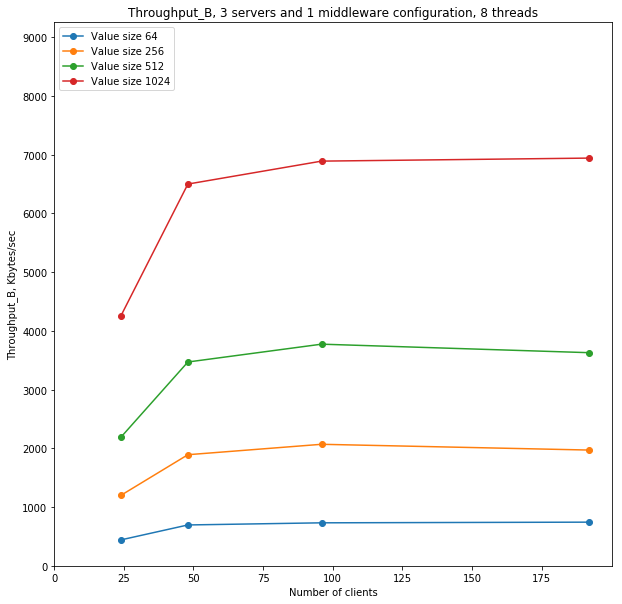

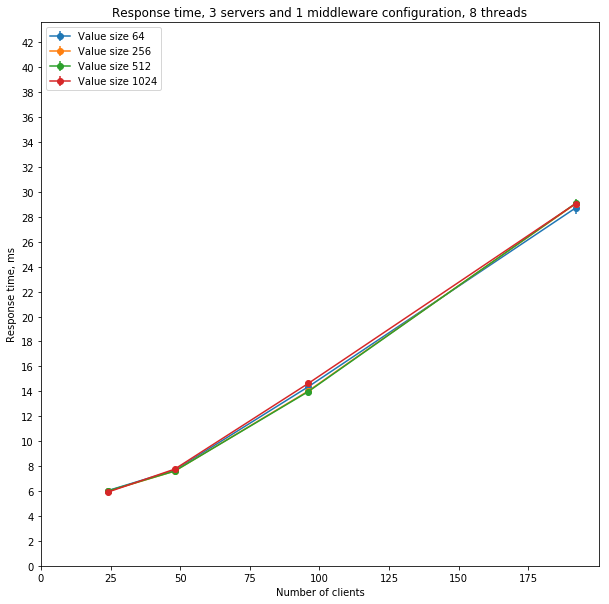

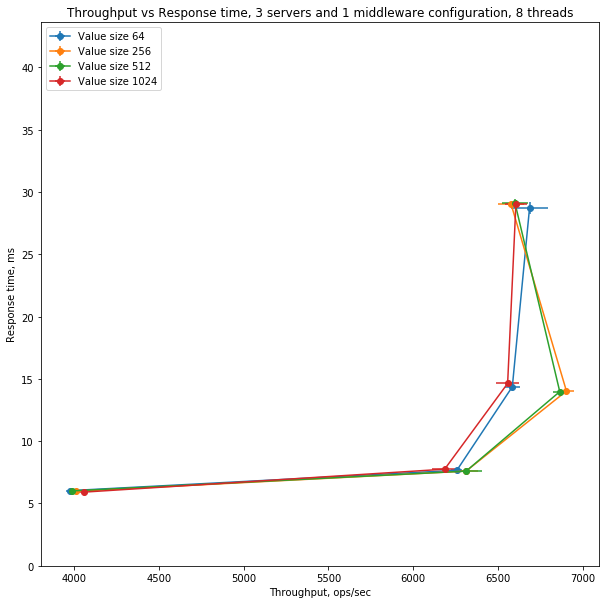

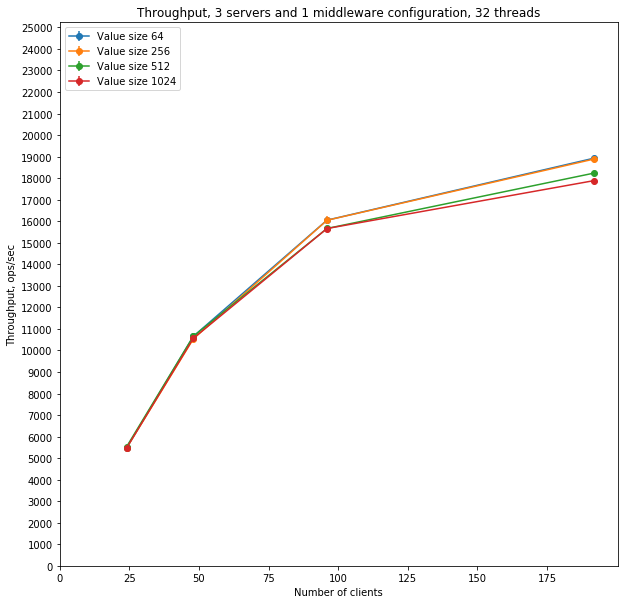

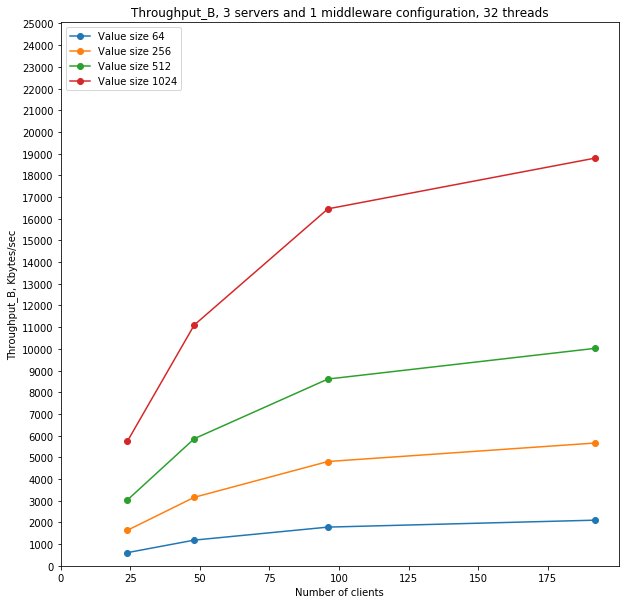

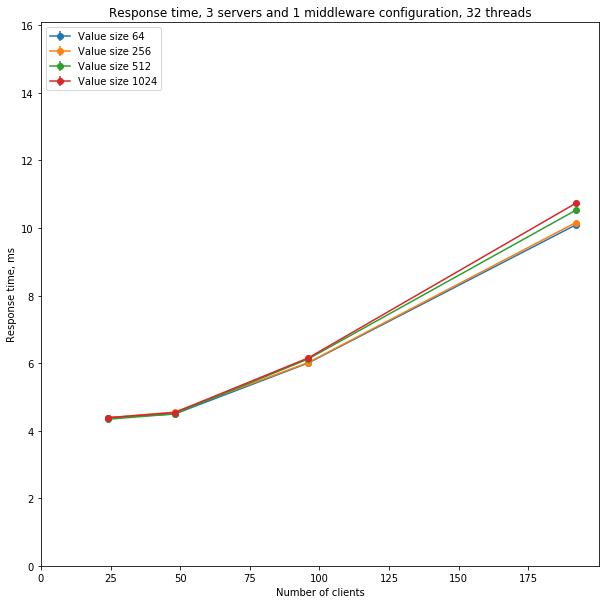

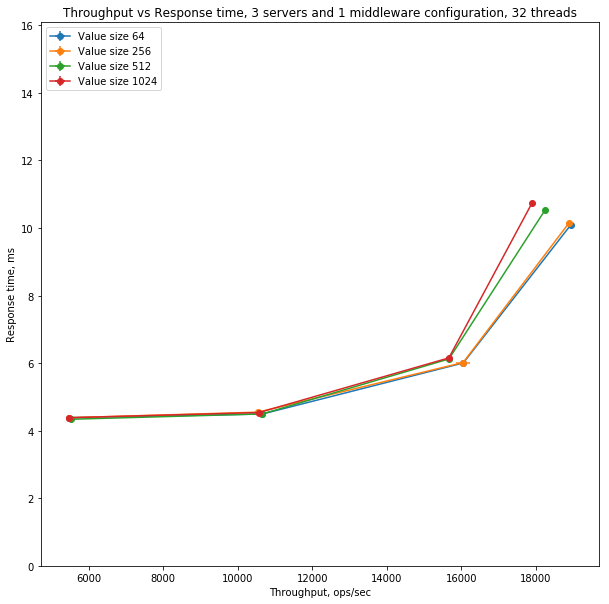

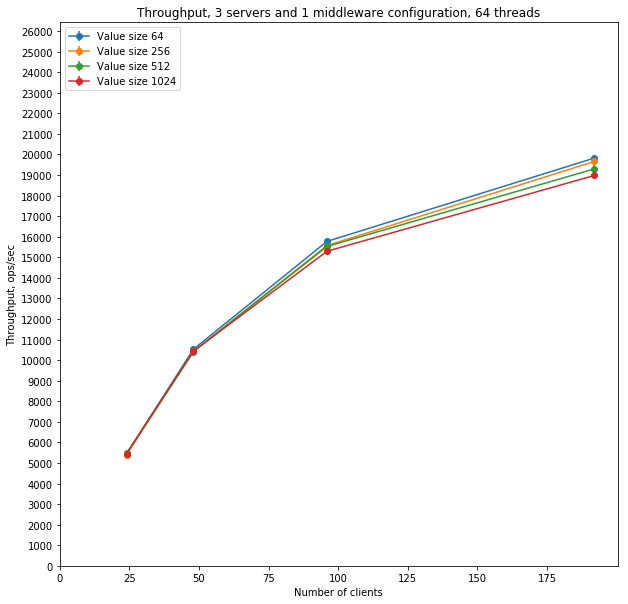

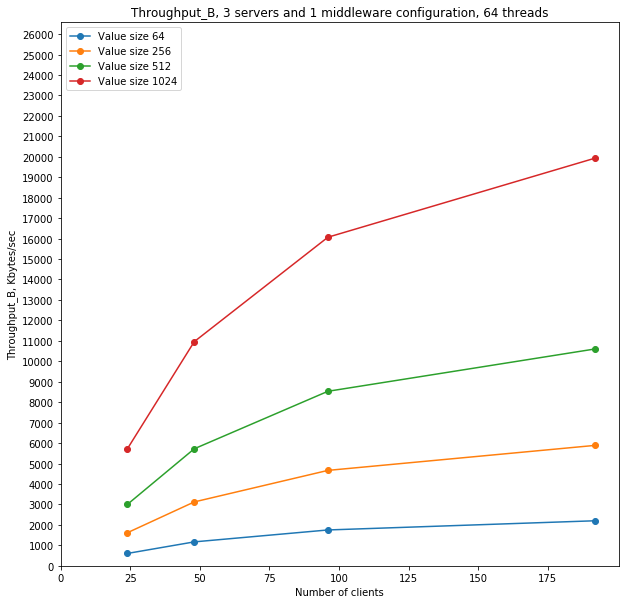

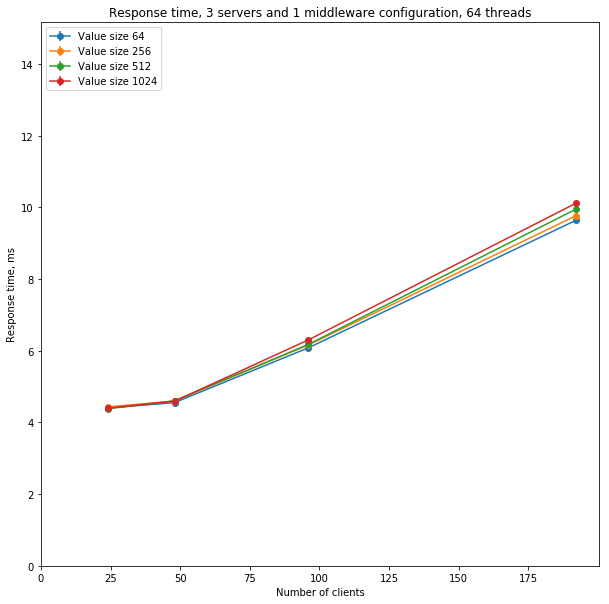

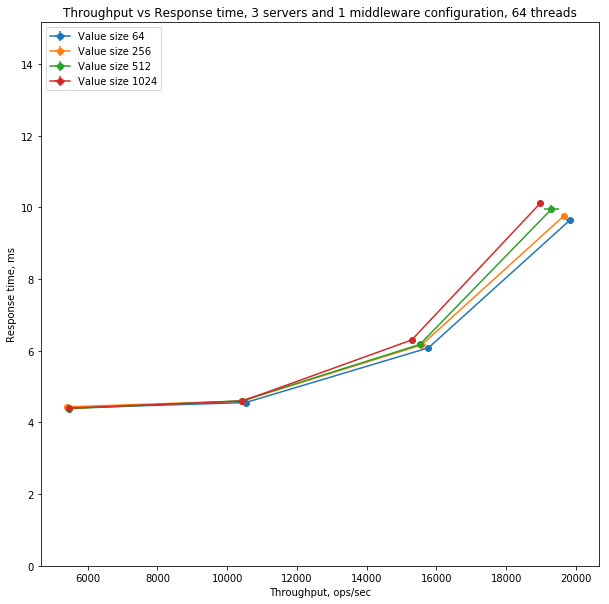

In [40]:
TR_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_cl_TR_value_file.txt", "w+")
RT_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_cl_RT_value_file.txt", "w+")


path_to_experiment="/home/anastasiia/experiment_1/fourth_copy/part4/"
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_cl_cl_"
value_sizes=[64, 256, 512, 1024]
client_numbers=[4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 
import re
import numpy as np


clients_data = []

for i in range(memtier_instances):
    initial = open(path_to_experiment+"client"+str(i+1)+".log","r")
    lines = initial.readlines()
    total_ops = 0
    for line in lines:
        if line.startswith("[RUN #1 100%"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            total_ops = parts[7]
        if line.startswith("Gets"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            parts = [parts[1], parts[4], parts[5], total_ops]
            clients_data.append(parts) 
    initial .close()


global_data = pd.DataFrame(columns=['Worker threads', 'Value size', 'Client number', 'Repetition', 'Memtier instance', 'TR', 'RT', 'TR_B', 'Total ops'])

j = 0
k = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                for memtier in range(memtier_instances):
                    d = [w, value_size, n, rep, memtier, clients_data[memtier * experiments + k][0], clients_data[memtier * experiments + k][1], clients_data[memtier * experiments + k][2], clients_data[memtier * experiments + k][3]]
                    global_data.loc[j] = d
                    j += 1
                k += 1

global_data['Worker threads'] = global_data['Worker threads'].astype(int)
global_data['Value size'] = global_data['Value size'].astype(int)
global_data['Client number'] = global_data['Client number'].astype(int)
global_data['Repetition'] = global_data['Repetition'].astype(int)
global_data['Memtier instance'] = global_data['Memtier instance'].astype(int)
global_data['TR'] = global_data['TR'].astype(float)
global_data['RT'] = global_data['RT'].astype(float)
global_data['TR_B'] = global_data['TR_B'].astype(float)
global_data['Total ops'] = global_data['Total ops'].astype(int)

global_data['Total time'] = global_data['RT']*global_data['Total ops']

TR_graph = []
X_axis =[i * 6 for i in client_numbers]

for w in workers:
    TR_overall = []
    RT_overall = []
    TR_B_overall = []
    TR_error_overall = []
    RT_error_overall = []
    for value_size in value_sizes:
        TR = []
        RT = []
        TR_B = []
        TR_error = []
        RT_error = []
        '''for memtier in range(memtier_instances):
            TR_client = []
            RT_client = []
            for client_number in client_numbers:
                subset = global_data[ (global_data['Value size'] == value_size) & 
                                 (global_data['Client number'] == client_number) &
                                 (global_data['Memtier instance'] == memtier)]

                groupped = subset.groupby(["Repetition"]).mean()
                groupped1 = subset.groupby(["Repetition"]).mean()
                TR_client.append(groupped.mean()['TR'])
                RT_client.append(groupped.mean()['RT'])'''

        for client_number in client_numbers:
            subset = global_data[(global_data['Worker threads'] == w) &
                                 (global_data['Value size'] == value_size) & 
                                 (global_data['Client number'] == client_number)]
            groupped = subset.groupby(['Repetition']).sum()
            TR_std = np.std(groupped['TR'].values)
            TR_error.append(TR_std)
            TR.append(float(groupped.mean()['TR']))
            # print to file
            TR_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped.mean()['TR']))
            for v in groupped['TR'].values:
                TR_value_file.write(" " + str(v))
            TR_value_file.write("\n")
            
            # end print to file
            
            groupped1 = subset.groupby(['Repetition']).sum()
            groupped2 = groupped1['Total time']/groupped1['Total ops']
            RT.append(float(groupped2.mean()))
            RT_std = np.std(groupped2.values)
            RT_error.append(RT_std)
             # print to file
            RT_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped2.mean()))
            for v in groupped2.values:
                RT_value_file.write(" " + str(v))
            RT_value_file.write("\n")
            
            # end print to file
            groupped3 = subset.groupby(['Repetition']).sum()
            TR_B.append(float(groupped3.mean()['TR_B']))
            
        TR_overall.append(TR)
        RT_overall.append(RT)
        TR_B_overall.append(TR_B)
        TR_error_overall.append(TR_error)
        RT_error_overall.append(RT_error)

    plt.figure(figsize=(10, 10))
    plt.title("Throughput, 3 servers and 1 middleware configuration, "+str(w) + " threads")
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 1000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.savefig(prefix + str(w)+"_tr.png", dpi=300)
    plt.show()
    
    plt.figure(figsize=(10, 10))
    plt.title("Throughput_B, 3 servers and 1 middleware configuration, "+str(w) + " threads")
    max1 = 0
    for i in range(len(TR_B_overall)):
        plt.plot(X_axis, TR_B_overall[i],'-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_B_overall[i]) + max(TR_B_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 1000))
    plt.ylabel('Throughput_B, Kbytes/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.savefig(prefix + str(w)+"_tr_b.png", dpi=300)
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Response time, 3 servers and 1 middleware configuration, "+str(w) + " threads")
    for i in range(len(RT_overall)):
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 2))
    plt.ylabel('Response time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.savefig(prefix + str(w)+"_rt.png", dpi=300) 
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Throughput vs Response time, 3 servers and 1 middleware configuration, "+str(w) + " threads")
    for i in range(len(RT_overall)):
        plt.errorbar(TR_overall[i], RT_overall[i],
                xerr=TR_error_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.ylabel('Response time, ms')
    plt.xlabel('Throughput, ops/sec') 
    plt.legend(loc="upper left")
    plt.savefig(prefix + str(w)+"_rttr.png", dpi=300) 
    plt.show()
TR_value_file.close()
RT_value_file.close()
        

In [ ]:
for i in range(len(TR_overall)):
    print(TR_overall[i])
    print(RT_overall[i])
    print([(1/t) * 1000 * c - r1 for t, c, r1 in zip(TR_overall[i], X_axis, RT_overall[i])])
    for j in range(len(TR_overall[i]) - 1):
        print((RT_overall[i][j+1]-RT_overall[i][j])/(X_axis[j+1]-X_axis[j]))
    RT_Z = [(1/t) * 1000 * c for t, c in zip(TR_overall[i], X_axis)]
    plt.figure(figsize=(10,10))
    plt.plot(X_axis, RT_Z)
    plt.ylim(0, max(RT_Z) + max(RT_Z)/2)
    plt.show()